***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [3]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [4]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [5]:
bins = [
  dados.Renda.min(),
  788 * 2,
  788 * 5,
  788 * 15,
  788 * 25,
  dados.Renda.max()
]

### 2º Definir os labels das classes

In [6]:
labels = ['E','D','C','B','A']

### 3º Construir a coluna de frequências

In [7]:
frequencia = pd.value_counts(
    pd.cut(x=dados.Renda,
        bins=bins,
        labels=labels,
        include_lowest=True))
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64


### 4º Construir a coluna de percentuais

In [8]:
percentual = pd.value_counts(
    pd.cut(x=dados.Renda,
           bins=bins,
           labels=labels,
           include_lowest=True),
           normalize=True) * 100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [9]:
dist_freq_e_perc_renda = pd.DataFrame({'Frequência': frequencia, 'Percentual (%)': percentual})
dist_freq_e_perc_renda.sort_index(ascending=False)

,Frequência,Percentual (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

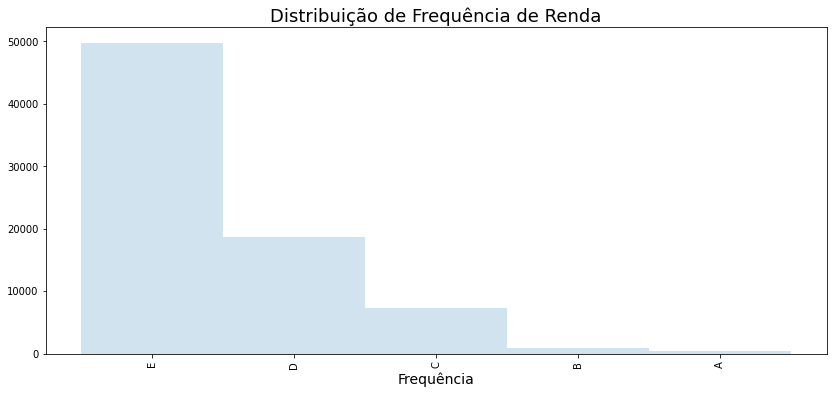

In [10]:
ax = dist_freq_e_perc_renda['Frequência'].plot.bar(width=1, alpha=0.2)
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequência de Renda', fontsize=18)
ax.set_xlabel('Frequência', fontsize=14)
ax

> ### Conclusões

A frequência de pessoas que possuem salários na classe E é extremamente maior que qualquer outra.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [11]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


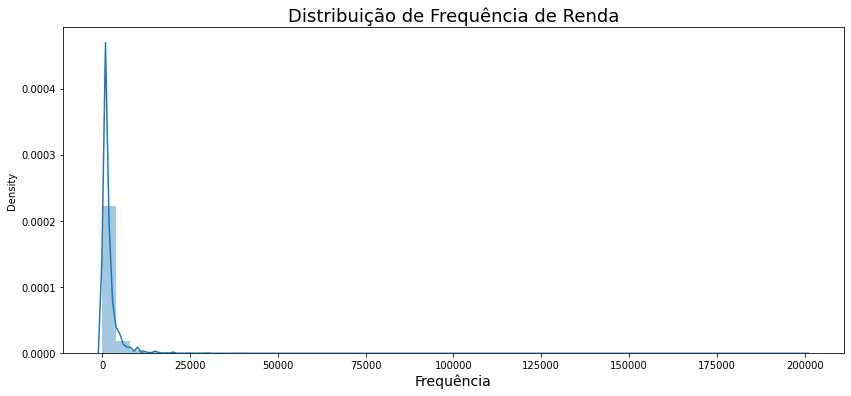

In [12]:
ax = sns.distplot(dados.Renda)
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequência de Renda', fontsize=18)
ax.set_xlabel('Frequência', fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


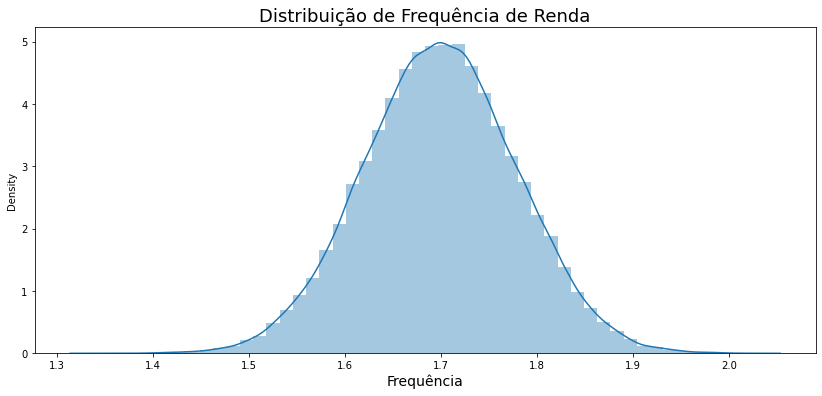

In [13]:
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequência de Renda', fontsize=18)
ax.set_xlabel('Frequência', fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


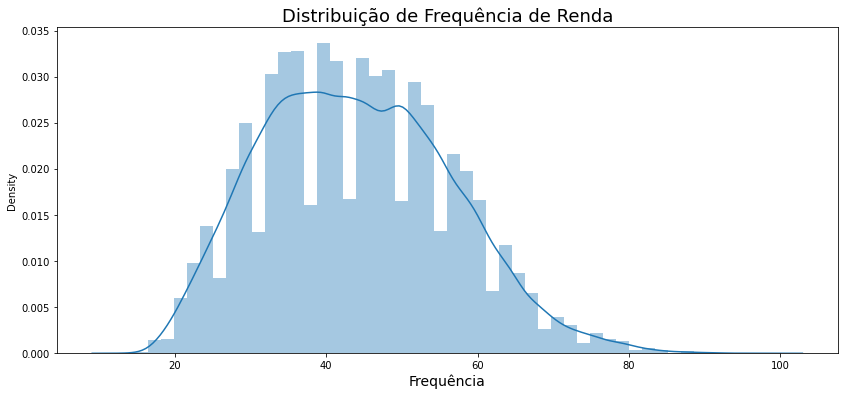

In [14]:
ax = sns.distplot(dados.Idade)
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequência de Renda', fontsize=18)
ax.set_xlabel('Frequência', fontsize=14)
ax

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


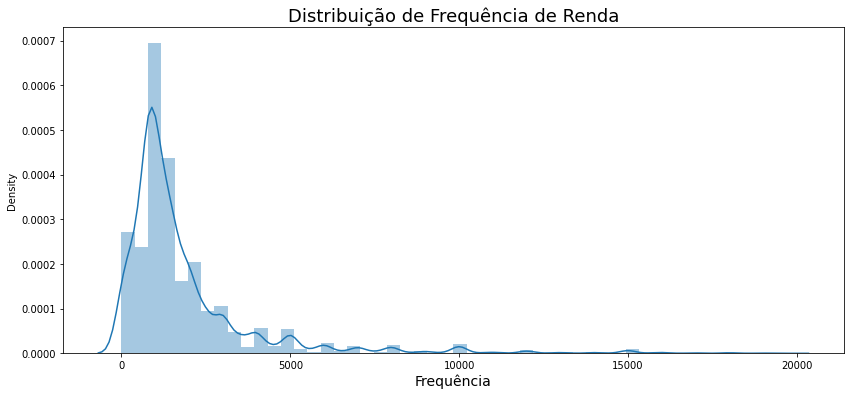

In [15]:
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequência de Renda', fontsize=18)
ax.set_xlabel('Frequência', fontsize=14)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [16]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [17]:
freq_sexo_por_cor = pd.crosstab(dados.Sexo, dados.Cor)
freq_sexo_por_cor.rename(index=sexo, inplace=True)
freq_sexo_por_cor.rename(columns=cor, inplace=True)
freq_sexo_por_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [18]:
perc_sexo_por_cor = pd.crosstab(dados.Sexo, dados.Cor, normalize=True) * 100
perc_sexo_por_cor.rename(index=sexo, inplace=True)
perc_sexo_por_cor.rename(columns=cor, inplace=True)
perc_sexo_por_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

A frequencia de pessoas pardas e brancas tanto em homens quanto mulheres são as maiores.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [19]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [20]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [21]:
dados.Renda.mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [22]:
dados.Renda.mad()

1526.4951371644931

### Obtenha a variância

In [23]:
dados.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [24]:
dados.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [25]:
estatisticas_da_renda_por_sexo_e_cor = pd.crosstab(dados.Cor,
                                                   dados.Sexo,
                                                   values=dados.Renda,
                                                   aggfunc=['mean','median','max','min'])
estatisticas_da_renda_por_sexo_e_cor.rename(index=cor, inplace=True)
estatisticas_da_renda_por_sexo_e_cor.rename(columns=sexo, inplace=True)
estatisticas_da_renda_por_sexo_e_cor

mean                 median  ...      max       min         
Sexo        Masculino     Feminino Masculino  ... Feminino Masculino Feminino
Cor                                           ...                            
Indígena  1081.710938  2464.386139     797.5  ...   120000         0        0
Branca    2925.744435  2109.866750    1700.0  ...   100000         0        0
Preta     1603.861687  1134.596400    1200.0  ...    23000         0        0
Amarela   4758.251064  3027.341880    2800.0  ...    20000         0        0
Parda     1659.577425  1176.758516    1200.0  ...    30000         0        0

[5 rows x 8 columns]

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [26]:
dispersao_da_renda_por_sexo_e_cor = pd.crosstab(dados.Cor,
                                                   dados.Sexo,
                                                   values=dados.Renda,
                                                   aggfunc=['mad','var','std'])
dispersao_da_renda_por_sexo_e_cor.rename(index=cor, inplace=True)
dispersao_da_renda_por_sexo_e_cor.rename(columns=sexo, inplace=True)
dispersao_da_renda_por_sexo_e_cor

mad               ...          std              
Sexo        Masculino     Feminino  ...    Masculino      Feminino
Cor                                 ...                           
Indígena   798.910889  3007.892952  ...  1204.093490  11957.498292
Branca    2261.012346  1670.967106  ...  4750.791872   3251.013154
Preta      975.602482   705.453357  ...  1936.309271   1349.799809
Amarela   3709.597211  2549.146322  ...  5740.824820   3731.173660
Parda     1125.827704   811.580946  ...  2312.087184   1596.233048

[5 rows x 6 columns]

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

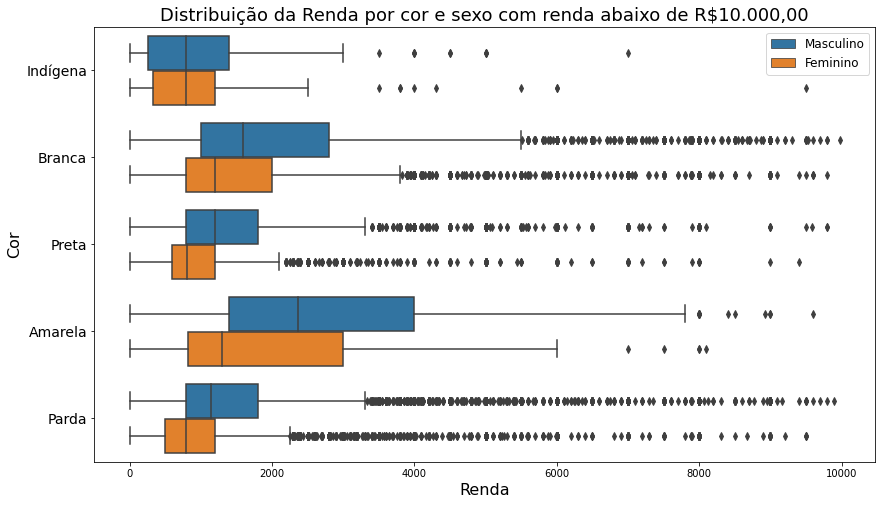

In [40]:
ax = sns.boxplot(x='Renda', y='Cor', hue='Sexo', data=dados.query('Renda < 10000'), orient='h')
ax.figure.set_size_inches(14,8)
ax.set_title('Distribuição da Renda por cor e sexo com renda abaixo de R$10.000,00', fontsize=18)
ax.set_ylabel('Cor', fontsize=16)
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=14)
ax.set_xlabel('Renda', fontsize=16)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)
ax

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [41]:
from scipy import stats

dados.Renda.quantile([i/10 for i in range(10)])

0.0       0.0
0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [42]:
dados.Renda.quantile(.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [43]:
estatisticas_da_renda_por_anos_de_estudo_e_sexo = pd.crosstab(dados['Anos de Estudo'],
                                                              dados.Sexo,
                                                              values=dados.Renda,
                                                              aggfunc=['mean','median','max','std'])

estatisticas_da_renda_por_anos_de_estudo_e_sexo.rename(index=anos_de_estudo, inplace=True)
estatisticas_da_renda_por_anos_de_estudo_e_sexo.rename(columns=sexo, inplace=True)
estatisticas_da_renda_por_anos_de_estudo_e_sexo

mean  ...          std
Sexo                              Masculino  ...     Feminino
Anos de Estudo                               ...             
Sem instrução e menos de 1 ano   799.494638  ...   639.311534
1 ano                            895.629047  ...   425.291842
2 anos                           931.178986  ...   498.234168
3 anos                          1109.203862  ...   424.124446
4 anos                          1302.329283  ...   629.553397
5 anos                          1338.653218  ...   635.782641
6 anos                          1448.875419  ...   574.547028
7 anos                          1465.497940  ...   602.038029
8 anos                          1639.396667  ...   896.781213
9 anos                          1508.038850  ...   973.221652
10 anos                         1731.270847  ...   620.611907
11 anos                         2117.060504  ...  1819.040417
12 anos                         2470.330776  ...  4851.833513
13 anos                         3195.099154  ...  2053.789771
14 anos                         3706.620269  ...  2064.083336
15 anos ou mais                 6134.279790  ...  4212.770709
Não determinados                1295.761905  ...   459.985964

[17 rows x 8 columns]

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

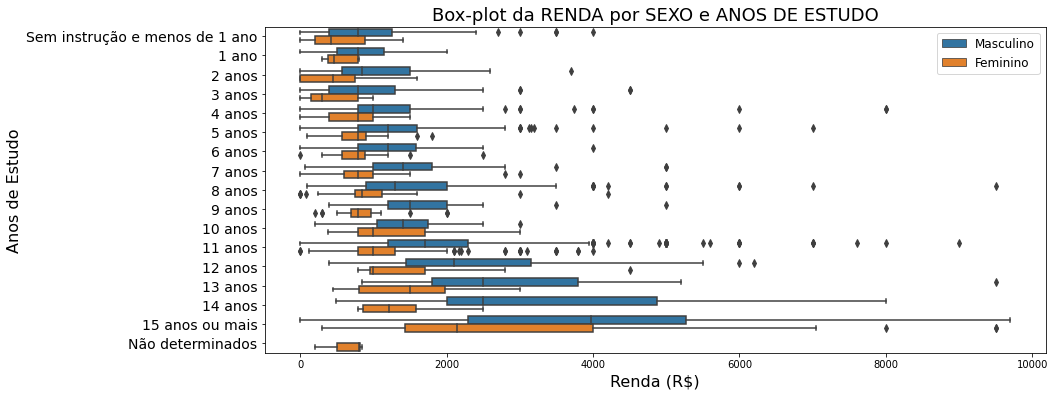

In [46]:
ax = sns.boxplot(x='Renda', y='Anos de Estudo', hue='Sexo', data=dados.query('Renda < 10000 and Idade == 40'), orient='h')
ax.figure.set_size_inches(14,6)
ax.set_title('Box-plot da RENDA por SEXO e ANOS DE ESTUDO', fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=16)
ax.set_ylabel('Anos de Estudo', fontsize=16)
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=14)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)
ax

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [48]:
estatisticas_da_renda_por_uf = dados.groupby('UF').agg({'Renda': ['mean','median','max','std']})
estatisticas_da_renda_por_uf.rename(index=uf, inplace=True)
estatisticas_da_renda_por_uf

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

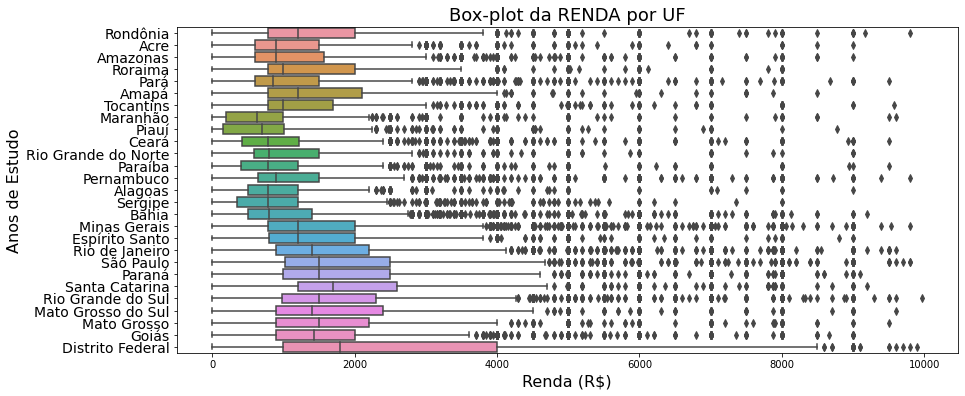

In [53]:
ax = sns.boxplot(x='Renda', y='UF', data=dados.query('Renda < 10000'), orient='h')
ax.figure.set_size_inches(14,6)
ax.set_title('Box-plot da RENDA por UF', fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=16)
ax.set_ylabel('Anos de Estudo', fontsize=16)
ax.set_yticklabels([key for key in uf.values()], fontsize=14)
ax

> ### Conclusões

Escreva suas conclusões aqui...